# Natural Language Processing

In [20]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

`nltk` comes with a bunch of datasets that are necessary for it to operate certain ways. `nltk.download_shell()` will bring up an interactive shell. Use `l` to list the datasets. The dataset we're interested in is `stopwords`. Type `d` for download, and then enter `stopwords`.

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
# Read in the data
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
# The list has been filled
print(len(messages))

5574


In [9]:
# Example of one item in the list
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
# Print the first 10 messages in the corpus, and number them using enumerate()
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [12]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Notice the `\t` in the string shown above. This means we have tab-separated values.

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We will now use `groupby()` to use `describe()` by the actual label.

In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We now want to start thinking about the features we want to be using. 

In [17]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
messages['length'] = messages['message'].apply(len)

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


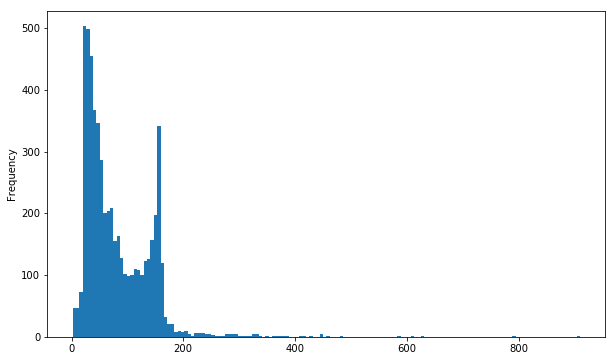

In [26]:
messages['length'].plot.hist(bins=150, figsize=(10, 6))

There looks to be some bimodal behavior. There is also an outlier at around length of 900. We will take a look at that now.

In [27]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [33]:
messages[messages['length'] == messages['length'].max()]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a181b9748>]], dtype=object)

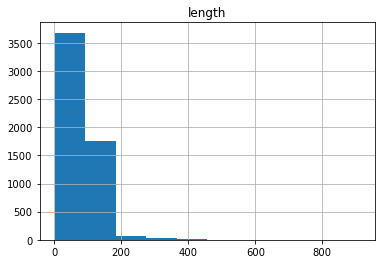

In [35]:
messages.hist()

So is message length a distinguishing feature between ham and spam?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18001e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a184ce7b8>], dtype=object)

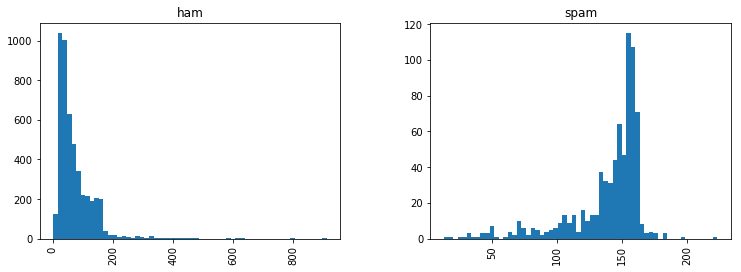

In [36]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

Spam messages tend to have longer message length.

We will now convert the raw messages (a sequence of characters) to vectors (a sequence of numbers).

In [37]:
import string

First, we will remove punctuation.

Test example:

In [38]:
mess = 'Sample message! Notice: it has punctuation.'

In [40]:
# Check is each character in mess is punctuation
nopunc = [c for c in mess if c not in string.punctuation]

In [46]:
# Punctuation has been removed
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


Remove stopwords from a corpus using `stopwords` from `nltk`:

In [43]:
from nltk.corpus import stopwords

In [44]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [51]:
# Remove stopwords from out example string (which now has no punctuation)
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [52]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [53]:
# Put everything we've done in our examples into a function
def text_process(mess):
    """
    1. Remove punctuation
    2. Remove stop words
    3. Return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [55]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


We are going to tokenize (turn the messages into a list of strings we actually want) the messages in the `message` column.

In [117]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

We need to convert each tokenized message into a vector that `SciKit-Learn` can work with.

Vectorization steps:
    1. Count how many times a word occurs in each message (term frequency).
    2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency).
    3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm).
We will use `CountVectorizer` to convert a collections of text documents into a matrix of token counts. Each row is a word, and each column is a text document. The values are the number of times a certain word appears in a certain document.

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
# The analyzer will be our previously defined function
# This can take a long time because the matrix will be large
# bow = Bag of Words
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [127]:
print(len(bow_transformer.vocabulary_))

11425


In [128]:
mess4 = messages['message'][3]

In [129]:
print(mess4)

U dun say so early hor... U c already then say...


In [130]:
bow4 = bow_transformer.transform([mess4])

In [135]:
# 7 unique words in bow4 after removing stopwords. 2 of these words appear twice.
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [136]:
print(bow4.shape)

(1, 11425)


In [139]:
# Confirm that the word that appears in the matrix at 4068 appears twice in the message
bow_transformer.get_feature_names()[9554]

'say'

Can use `.transform()` on our bag of words transformed object and transform the entire dataframe of messages.

In [141]:
# The bag of word counts for the entire SMS corpus is a large, sparse matrix
messages_bow = bow_transformer.transform(messages['message'])

In [145]:
print('Shape of the Sparse Matrix:', messages_bow.shape)

Shape of the Sparse Matrix: (5572, 11425)


In [146]:
# Amount of non-zero occurrences
messages_bow.nnz

50548

In [149]:
# Check the sparsity
# Proportion of non-zero entries to overall entries
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


Term weight and normalization can be done with `tfidf` (term frequency inverse document frequency)

In [150]:
from sklearn.feature_extraction.text import TfidfTransformer

In [151]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [152]:
tfidf4 = tfidf_transformer.transform(bow4)

In [153]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


We now have an inverse document frequency and term frequency relationship for this particular message. We basically have a weight value for each word versus the actual document.

We will now check the inverse document frequency of a particular word. We will do it for "university."

In [156]:
# Get the inverse document frequency
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [155]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

Now convert the entire bag of words corpus into a tfidf corpus at once.

In [157]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

Now we have the messages as numberical vectors. We can use Naive Bayes Classifier to train our spam/ham classifier.

In [158]:
from sklearn.naive_bayes import MultinomialNB

In [159]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Classify our single random message and see how we do.

In [161]:
spam_detect_model.predict(tfidf4)[0]

'ham'

The model correctly thinks the tfidf4 will be `ham`.

In [162]:
messages['label'][3]

'ham'

Run the prediction on all messages in the tfidf:

In [163]:
all_pred = spam_detect_model.predict(messages_tfidf)

Now that we have an idea of how everything words, we will use a train-test split to create a better model.

In [164]:
from sklearn.cross_validation import train_test_split

In [165]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [166]:
msg_train

59               Yes..gauti and sehwag out of odi series.
1417              No..few hours before.went to hair cut .
20              Is that seriously how you spell his name?
5233     Hey what how about your project. Started aha da.
1821    I'll probably be by tomorrow (or even later to...
2232    K, wen ur free come to my home and also tel vi...
5326                           What makes you most happy?
4662                                        Ok no prob...
4672    Probably not, I'm almost out of gas and I get ...
3931    I thk ü gotta go home by urself. Cos i'll b go...
334     Any chance you might have had with me evaporat...
1547                Shant disturb u anymore... Jia you...
3106                           Or remind me in a few hrs.
3819    74355 XMAS iscoming & ur awarded either £500 C...
709     To review and KEEP the fantastic Nokia N-Gage ...
997     Yetunde i'm in class can you not run water on ...
5353    Guai... Ü shd haf seen him when he's naughty.....
5393    All do

We are going to use SkiKit-Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations we will do to the data for future use. We won't have to do all the steps we did earlier of count vectorization, transformation, etc.

In [167]:
from sklearn.pipeline import Pipeline

In [171]:
# The steps argument is a list of everything we want to do
# (name_of_our_step, what_we_want_to_do)
# The string is just a label for us to reference later
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # String to token integer counts step
    ('tfidf', TfidfTransformer()), # Turn those integer counts to weighted tfidf scores
    ('classifier', MultinomialNB()) # Naive Bayes Classifier
])

In [172]:
pipeline.fit(X=msg_train, y=label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a18613ae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [173]:
predictions = pipeline.predict(msg_test)

In [174]:
from sklearn.metrics import classification_report

In [175]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1439
       spam       1.00      0.71      0.83       233

avg / total       0.96      0.96      0.96      1672



Use Random Forest Classification instead of MultinomialNB:

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
pipeline_RF = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # String to token integer counts step
    ('tfidf', TfidfTransformer()), # Turn those integer counts to weighted tfidf scores
    ('classifier', RandomForestClassifier()) # Naive Bayes Classifier
])

In [178]:
pipeline.fit(X=msg_train, y=label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a18613ae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [180]:
predictions = pipeline.predict(msg_test)

In [181]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1439
       spam       1.00      0.71      0.83       233

avg / total       0.96      0.96      0.96      1672

